# 2017 French presidential elections

My aim was to highlight differences between Emmanuel Macron and Marine Le Pen, the two candidates who went to the second round of the 2017 French presidential elections.

I have downloaded transcripts of the speeches that the two candidates performed from the 1st of January 2017 to the 1st of May 2017.

In total:<br>
* Macron: 31 transcripts available out of 31 speeches
* Le Pen: 25 transcrits available (transcripts: 21, subtitles: 4) out of 35 speeches.

Sources:
* Macron: https://en-marche.fr/articles/discours
* Le Pen: http://www.frontnational.com/categorie/discours/

![image](https://github.com/AurelieDaviaud/2017-French-presidential-elections/blob/master/LePen-Macron.png "Le Pen vs Macron")

## Create word clouds

We can create word clouds to visualize the main words used by each candidate.

In [29]:
import os
import numpy as np
import nltk
from nltk.corpus import stopwords
import string
import re
import copy
from string import digits

In [31]:
## Load data
listFiles = os.listdir("~/Presidentielles2017/Data")

### Preprocess the speeches

First, have to preprocess the speeches to keep only important words. So we have to clean up irregularities (i.e. change to lowercase and remove punctuation) and to remove stop words.

We have to prepare a list of French stopwords (as comprehensive as possible, by combining several existing lists of stopwords).

In [32]:
## Prepare stop words
stopw = open("stopwords-fr1.txt", "r").read()
months = ["janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre"]
n = re.compile('\n')
stopw = n.sub(' ', stopw)
stopw = nltk.word_tokenize(stopw)
stopw = stopw + stopwords.words('french') + months 

Some transcripts of Le Pen's speeches are actually subtitles. So, we also have to remove the timestamp and any backest that usually include sound effect. <br>
Moreover, transcripts of Le Pen's and Macron's speeches do not have the same format. So we are going to use two different functions to process the documents.

#### Function to preprocess subtitles and speeches of Le Pen

(part of the function as been adapted from http://sapir.psych.wisc.edu/wiki/index.php/Extracting_and_analyzing_subtitles)

In [33]:
def cleanLP(str, subtitle=False):

    timestamp = re.compile('^\d+\n?.*\n?', re.MULTILINE)         # finds line numbers and the line after them (which usually houses timestamps)
    brackets = re.compile('\[[^]]*\]\n?|\([^)]*\)\n?|<[^>]*>\n?|\{[^}]*\}\n?')   # finds brackets and anything in between them (sound effects)    
    opensubs = re.compile('.*subtitles.*\n?|.*subs.*\n?', re.IGNORECASE)         # finds the opensubtitles signature   
    urls = re.compile('www.*\s\n?|[^\s]*\. ?com\n?')    # finds any urls     
    r = re.compile('\r')                                # gets rid of \r
    n = re.compile('\n')                                # finds newlines
    punctuation = re.compile("[^\w\s']")                # finds punctuation

    if subtitle:
        str = timestamp.sub('', str)
        str = brackets.sub('', str)
        str = opensubs.sub('', str)
        str = urls.sub('', str)
    str = str.lower()                                   # change to lowercase
    str = r.sub('', str)                                # remove \r
    str = n.sub(' ', str)                               # remove newlines
    str = punctuation.sub(' ', str)                     # remove punctuation
    str = str.replace("'", " ")                         # remove apostrophes
    remove_digits = str.maketrans('', '', digits)       # remove digits
    str = str.translate(remove_digits)
    tokens = nltk.word_tokenize(str)                    # tokenize (i.e create a list of words)
    tokens = [w for w in tokens if not w in stopw]

    return tokens

#### Function to preprocess speeches of Macron

In [34]:
def cleanMac(str):

    brackets = re.compile('\[[^]]*\]\n?|\([^)]*\)\n?|<[^>]*>\n?|\{[^}]*\}\n?')  # finds brackets and anything in between them (sound effects)    
    opensubs = re.compile('.*str.*\n?|.*subs.*\n?', re.IGNORECASE)              # finds the opensubtitles signature   
    urls = re.compile('www.*\s\n?|[^\s]*\. ?com\n?')     # finds any urls     
    r = re.compile('\r')                                 # finds rid of \r
    n = re.compile('\n')                                 # finds newlines
    punctuation = re.compile("[^\w\s']")                 # finds punctuation
    str = '\n'.join(str.split('\n')[9:])                 # remove 9th first lines
    str = brackets.sub('', str)
    str = opensubs.sub('', str)
    str = urls.sub('', str)
    str = str.replace("Seul le prononcé fait foi. page ", "")  # remove words included in the footer and header of the transcript
    str = str.replace("en-marche.fr", "")
    str = str.replace("Discours d’Emmanuel Macron", "")
    str = str.replace("Aller plus loin", "")
    str = str.replace("Téléchargez la fiche avec les propositions >", "")
    str = str.replace("bit.ly/fichesynthèse-santé ", "")
    str = str.replace("Le replay >", "")
    str = str.replace("EnMarche/videos/", "")
    str = str.replace("facebook.com", "")
    str = str.replace("Suivez Emmanuel Macron ", "")
    str = str.replace("\x0c", "")
    str = str.lower()                                       # change to lowercase
    str = r.sub('', str)                                    # remove \r
    str = n.sub(' ', str)                                   # remove newlines
    str = punctuation.sub(' ', str)                         # remove punctuation
    str = str.replace("'", " ")                             # remove apostrophes
    remove_digits = str.maketrans('', '', digits)           # remove digits
    str = str.translate(remove_digits)
    tokens = nltk.word_tokenize(str)                        # tokenize (i.e create a list of words)
    tokens = [w for w in tokens if not w in stopw]

    return tokens

#### Preprocess the speeches

In [35]:
tokenMacTot = []
tokenLPTot = []

for file in listFiles:
    str = open(file, "r").read()

    if "MACRON" in file:
        tokenMac = cleanMac(str)
        tokenMacTot = tokenMacTot + tokenMac
    if "Le Pen" in file:
        if "Subtitle" in file: 
            tokenLP = cleanLP(str, subtitle=True)
            tokenLPTot = tokenLPTot + tokenLP
        else:
            tokenLP = cleanLP(str, subtitle=False)
            tokenLPTot = tokenLPTot + tokenLP

### Store the tokens

In [ ]:
tokens_mac_file = open('tokens_mac.txt', 'w')
for item in tokenMacTot:
    tokens_mac_file.write("%s\n" % item)

tokens_LP_file = open('tokens_LP.txt', 'w')
for item in tokenLPTot:
    tokens_LP_file.write("%s\n" % item)

### Analyse the data

Let's see whether the number of words used by each candidate is similar.

In [8]:
# Macron
tokenMacUni = set(tokenMacTot)
len(tokenMacUni)

11108

In [9]:
# Le Pen
tokenLPUni = set(tokenLPTot)
len(tokenLPUni)

12525

Macron seems to have a vocabulary that is a bit less varied than Le Pen.

### Count words

Now, we have to compute the frequency of each word for each candidate to create the word clouds.

In [36]:
from collections import Counter

# Macron
n = re.compile('\n')
tokenMacTot = open("tokens_mac.txt", "r").read()
tokenMacTot = n.sub(' ', tokenMacTot)
tokenMacTot = nltk.word_tokenize(tokenMacTot)

mac = Counter(tokenMacTot)
mac_most = mac.most_common(n=100)


# Le Pen
tokenLPTot = open("tokens_LP.txt", "r").read()
tokenLPTot = n.sub(' ', tokenLPTot)
tokenLPTot = nltk.word_tokenize(tokenLPTot)

LP = Counter(tokenLPTot)
LP_most = LP.most_common(n=100)

### Create word clouds

In [37]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

str_mac = open("tokens_mac.txt", "r").read()
str_lp = open("tokens_LP.txt", "r").read()

In [38]:
## Generate word clouds
mac = WordCloud(background_color="white", collocations= False, font_path='C:/Windows/Fonts/Verdana.ttf')
wordcloud_mac = mac.generate(str_mac)

In [39]:
lp = WordCloud(background_color="white", collocations= False, font_path='C:/Windows/Fonts/Verdana.ttf')
wordcloud_lp = lp.generate(str_lp)

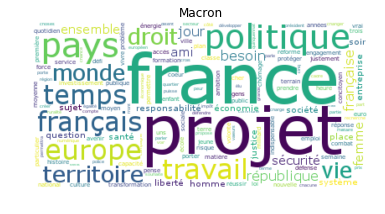

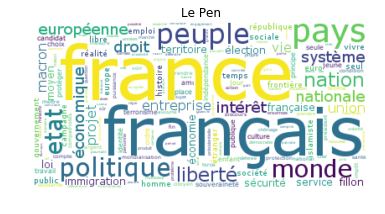

In [40]:
## Show word clouds
plt.figure()
plt.imshow(wordcloud_mac, interpolation='bilinear')
plt.axis("off")
plt.title("Macron")
plt.show()

plt.figure()
plt.imshow(wordcloud_lp, interpolation='bilinear')
plt.axis("off")
plt.title("Le Pen")
plt.show()

The two candidates seem to use frequently the same words: France/français/française, Europe/européen/européenne, pays/nation/république, sécurité, monde, économie/économique, territoire... <br>
Well... that's not very surprising in a presidential election...<br>
This kind of word cloud may not be the best strategy to highlight their differences then. <br>

However, we can already highlight some differences. The words "Fillon" and "Macron" appear in the speeches of Le Pen whereas no name appears in the most frequent words used by Macron. Indeed, Le Pen is well known for always strongly criticize her opponants. <br>

We will delve further into these differences. But, first, let's make our word clouds a bit nicer.

We can use the pictures of each candidate as masks for the word clouds.

In [50]:
## Generate mask (load and format image) (NB: background must be transparent)

# Macron
mac_im = Image.open("F:/Boulot/00-DataScience/Portfolio/Presidentielles2017/macronNB.png")
mac_mask = Image.new("RGB", mac_im.size, (255,255,255))
mac_mask.paste(mac_im, mac_im)
mac_mask = np.array(mac_mask)

# Le Pen
lp_im = Image.open("F:/Boulot/00-DataScience/Portfolio/Presidentielles2017/lepenBleu.png")
lp_mask = Image.new("RGB", lp_im.size, (255,255,255))
lp_mask.paste(lp_im, lp_im)
lp_mask = np.array(lp_mask)

In [51]:
## Generate word clouds with mask

mac_mask = WordCloud(background_color="white", collocations= False, font_path='C:/Windows/Fonts/Verdana.ttf', mask=mac_mask)
wordcloud_mac_mask = mac_mask.generate(str_mac)

lp_mask = WordCloud(background_color="white", collocations= False, font_path='C:/Windows/Fonts/Verdana.ttf', mask=lp_mask)
wordcloud_lp_mask = lp_mask.generate(str_lp)

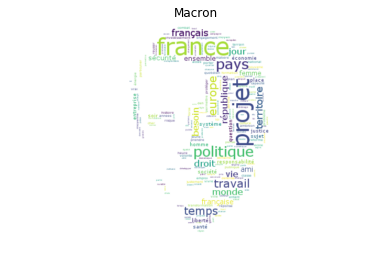

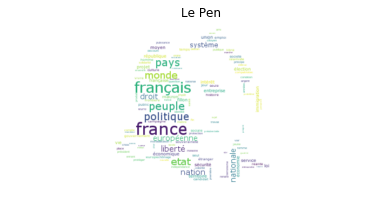

In [52]:
## Show word clouds
plt.figure()
plt.imshow(wordcloud_mac_mask, interpolation='bilinear')
plt.axis("off")
plt.title("Macron")
plt.show()

plt.figure()
plt.imshow(wordcloud_lp_mask, interpolation='bilinear')
plt.axis("off")
plt.title("Le Pen")
plt.show()

Now, let's see whether we can color the words using the colors of the French flag: blue, white and red.

In [53]:
import random
def BBR_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "%s" % random.choice(["hsl(240, 100%, 25%)", "hsl(0, 0%, 100%)", "hsl(0, 100%, 50%)"])

In [55]:
## Generate mask (load and format image) (NB: background must be transparent)

# Macron
mac_im = Image.open("F:/Boulot/00-DataScience/Portfolio/Presidentielles2017/macronNB.png")
mac_mask = Image.new("RGB", mac_im.size, (255,255,255))
mac_mask.paste(mac_im, mac_im)
mac_mask = np.array(mac_mask)

# Le Pen
lp_im = Image.open("F:/Boulot/00-DataScience/Portfolio/Presidentielles2017/lepenBleu.png")
lp_mask = Image.new("RGB", lp_im.size, (255,255,255))
lp_mask.paste(lp_im, lp_im)
lp_mask = np.array(lp_mask)

In [56]:
## Generate word clouds with mask and coloring from French flag

mac = WordCloud(background_color="black", color_func=BBR_color_func, random_state=3, relative_scaling=0.5, collocations= False, font_path='C:/Windows/Fonts/Verdana.ttf', mask=mac_mask)
wordcloud_mac = mac.generate(str_mac)	

lp = WordCloud(background_color="black", color_func=BBR_color_func, random_state=3, relative_scaling=0.5, collocations= False, font_path='C:/Windows/Fonts/Verdana.ttf', mask=lp_mask)
wordcloud_lp = lp.generate(str_lp)	

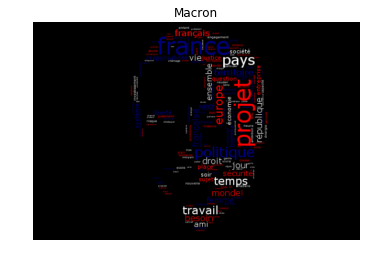

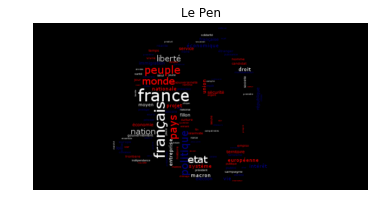

In [58]:
## Show word clouds
plt.figure()
plt.imshow(wordcloud_mac, interpolation='bilinear')
plt.axis("off")
plt.title("Macron")
plt.show()

plt.figure()
plt.imshow(wordcloud_lp, interpolation='bilinear')
plt.axis("off")
plt.title("Le Pen")
plt.show()

In [ ]:
## Store to file
mac.to_file("~/macron_wc.png")
mac.to_file("macron_wcBBR.png")

lp.to_file("~/lepen_wc.png")
lp.to_file("lepen_wcBBR.png")

<br>
Now, let's go back and see whether we can make the differences between Macron and Le Pen more obvious.

## Create word clouds 2: focusing on differences

Now, we are going to keep only the words that are different among the most frequent words used by the two candidates.

analysis coming soon...

## Sentiment analysis

What about sentiment of people towards Macron and Le Pen?

analysis coming soon...